In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size':22})
# rcParams['font.family'] = ['NotoSansCJKtc']
# 機車死亡事故中 機車駕駛是第一當事人的比率

In [3]:
df = pd.read_csv("110年-臺北市A1及A2類交通事故明細.csv", encoding="big5")

In [4]:
df.head()

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,2-30日死亡人數,...,飲酒情形,車輛撞擊部位1,車輛撞擊部位2,肇因碼-個別,肇因碼-主要,個人肇逃否,職業,旅次目的,X,Y
0,110,1,1,0,30,2,04大安區,大安區復興南路2段193巷與和平東路2段265巷口口,0,0,...,1.0,14.0,NaN,6.0,6,1.0,22.0,9.0,121.544028,25.025702
1,110,1,1,0,30,2,04大安區,大安區復興南路2段193巷與和平東路2段265巷口口,0,0,...,1.0,5.0,NaN,13.0,6,1.0,22.0,9.0,121.544028,25.025702
2,110,1,1,0,34,2,03中山區,中山區北安路機車專用道往士林,0,0,...,1.0,11.0,NaN,16.0,16,1.0,22.0,9.0,121.551264,25.086169
3,110,1,1,0,34,2,03中山區,中山區北安路機車專用道往士林,0,0,...,1.0,13.0,NaN,44.0,16,1.0,22.0,9.0,121.551264,25.086169
4,110,1,1,0,50,2,07信義區,信義區吳興街與吳興街361巷口,0,0,...,1.0,1.0,NaN,6.0,6,1.0,22.0,9.0,121.566471,25.025775


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55366 entries, 0 to 55365
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   發生年         55366 non-null  int64  
 1   發生月         55366 non-null  int64  
 2   發生日         55366 non-null  int64  
 3   發生時         55366 non-null  int64  
 4   發生分         55366 non-null  int64  
 5   處理別         55366 non-null  int64  
 6   區序          55366 non-null  object 
 7   肇事地點        55366 non-null  object 
 8   死亡人數        55366 non-null  int64  
 9   2-30日死亡人數   55366 non-null  int64  
 10  受傷人數        55366 non-null  int64  
 11  當事人序        55366 non-null  int64  
 12  車種          54109 non-null  object 
 13  4天候         55366 non-null  int64  
 14  5光線         55366 non-null  int64  
 15  6道路類別       55366 non-null  int64  
 16  7速限         55366 non-null  int64  
 17  8道路型態       55366 non-null  int64  
 18  9事故位置       55366 non-null  int64  
 19  10路面狀況1     55366 non-nul

In [6]:
from datetime import datetime

df["發生年"] = df["發生年"] + 1911
df.rename(columns={'發生年': 'year', '發生月': 'month', '發生日': 'day', '發生時': 'hour', '發生分': 'minute'}, inplace=True)
dt = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df = df.drop(["year", "month", "day", "hour", "minute"], axis=1)
df.insert(0, "時間", dt)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55366 entries, 0 to 55365
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   時間          55366 non-null  datetime64[ns]
 1   處理別         55366 non-null  int64         
 2   區序          55366 non-null  object        
 3   肇事地點        55366 non-null  object        
 4   死亡人數        55366 non-null  int64         
 5   2-30日死亡人數   55366 non-null  int64         
 6   受傷人數        55366 non-null  int64         
 7   當事人序        55366 non-null  int64         
 8   車種          54109 non-null  object        
 9   4天候         55366 non-null  int64         
 10  5光線         55366 non-null  int64         
 11  6道路類別       55366 non-null  int64         
 12  7速限         55366 non-null  int64         
 13  8道路型態       55366 non-null  int64         
 14  9事故位置       55366 non-null  int64         
 15  10路面狀況1     55366 non-null  int64         
 16  10路面狀況2     55366 non-

,時間,處理別,區序,肇事地點,死亡人數,2-30日死亡人數,受傷人數,當事人序,車種,4天候,...,飲酒情形,車輛撞擊部位1,車輛撞擊部位2,肇因碼-個別,肇因碼-主要,個人肇逃否,職業,旅次目的,X,Y
0,2021-01-01 00:30:00,2,04大安區,大安區復興南路2段193巷與和平東路2段265巷口口,0,0,1,1,C03,8,...,1.0,14.0,NaN,6.0,6,1.0,22.0,9.0,121.544028,25.025702
1,2021-01-01 00:30:00,2,04大安區,大安區復興南路2段193巷與和平東路2段265巷口口,0,0,1,2,B03,8,...,1.0,5.0,NaN,13.0,6,1.0,22.0,9.0,121.544028,25.025702
2,2021-01-01 00:34:00,2,03中山區,中山區北安路機車專用道往士林,0,0,1,1,C03,8,...,1.0,11.0,NaN,16.0,16,1.0,22.0,9.0,121.551264,25.086169
3,2021-01-01 00:34:00,2,03中山區,中山區北安路機車專用道往士林,0,0,1,2,C03,8,...,1.0,13.0,NaN,44.0,16,1.0,22.0,9.0,121.551264,25.086169
4,2021-01-01 00:50:00,2,07信義區,信義區吳興街與吳興街361巷口,0,0,1,1,B03,7,...,1.0,1.0,NaN,6.0,6,1.0,22.0,9.0,121.566471,25.025775


In [7]:

df[df["死亡人數"] > 0].count()

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


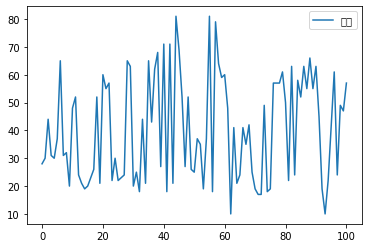

In [8]:
sns.lineplot(data=df.loc[:100, ["時間", "年齡"]])

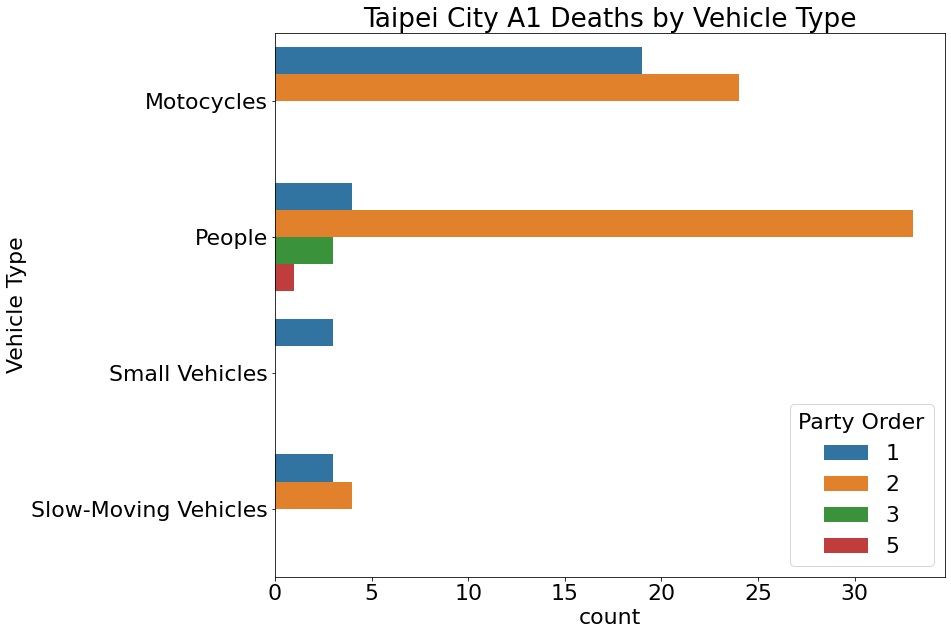

In [13]:
# C = 機車
# C01 => C
# A01 => A
df["車種"] = df["車種"].str[0]
dead = df[(df["受傷程度"] == 1) | (df["受傷程度"] == 5)].drop_duplicates(subset=["時間", "肇事地點"])
dead["車種"] = dead["車種"].replace({"A": "Large Vehicles", "B": "Small Vehicles", "C": "Motocycles", "D": "Military Vehicles",
                   "E": "Special Vehicles", "F": "Slow-Moving Vehicles", "G": "Other Vehicles", "H": "People"})
dead.rename(columns={"死亡人數":"Deaths", "車種":"Vehicle Type", "當事人序":"Party Order"}, inplace=True)
plt.figure(figsize=(12,10))
sns.countplot(data=dead, y="Vehicle Type", hue="Party Order")
plt.legend(title="Party Order", loc="lower right")
plt.title("Taipei City A1 Deaths by Vehicle Type")

In [15]:
# 機車死亡
# (當事人)受傷程度 1 = 24h內死亡, 5 = 30d內死亡
df_moto_dead = df[(df["車種"] == "C") & ((df["受傷程度"] == 1) | (df["受傷程度"] == 5))]
df_moto_dead_party_1 = df_moto_dead[df_moto_dead["當事人序"] == 1]
df_moto_dead_not_party_1 = df_moto_dead[df_moto_dead["當事人序"] != 1]
total = df_moto_dead.shape[0]
moto_dead_party_1 = df_moto_dead_party_1.shape[0]
moto_dead_not_party_1 = df_moto_dead_not_party_1.shape[0]

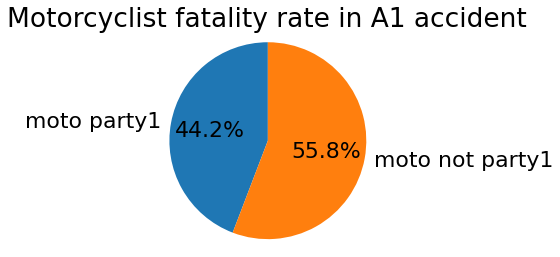

In [19]:
sizes = [moto_dead_party_1, moto_dead_not_party_1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=["moto party1", "moto not party1"], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Motorcyclist fatality rate in A1 accident")
plt.figure(figsize=(20, 12))
plt.show()
plt.savefig(fname="pie.png")

In [126]:
df_dead = df[(df["受傷程度"] == 1) | (df["受傷程度"] == 5)]
s = df_dead[df_dead["當事人序"] == 1]["車種"]
s.value_counts()

In [71]:
print("去掉重複資料前:", df.shape[0])
df = df.drop_duplicates(subset=["時間", "肇事地點"])
print("去掉重複資料後:", df.shape[0])

去掉重複資料前: 22844
去掉重複資料後: 22844
